In [10]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

with open('Session1H.pkl', 'rb') as f:
    data = pickle.load(f)

In [11]:
data.keys()

dict_keys(['D', 'id_eye', 'id_left', 'id_neuron', 'id_short', 'id_trial', 'sp_times', 't_p', 't_s'])

In [38]:
print(np.array(data["D"].shape))

[1200   16  945]


In [141]:
R=np.array(data["D"])
R[0,0,9:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [43]:
data_trim_time= R[np.isnan(R[:,:,0]).sum(axis=1)<16,:,0]

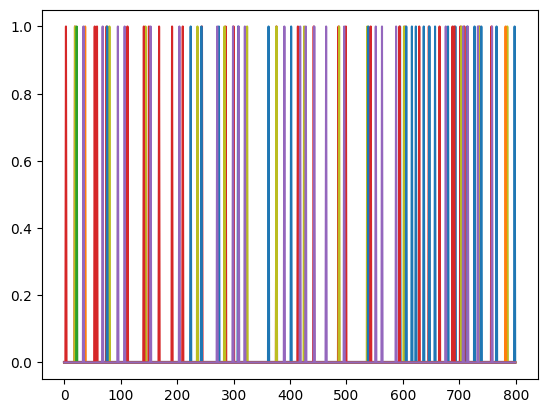

In [49]:
plt.plot(data_trim_time)

In [203]:
def slider(spikes,time_window=100):
    fr=[]
    for i in range(time_window,len(spikes)):
        fr.append(np.nansum((spikes[max(0,i-time_window):i])))
    return np.array(fr)
slider(R[:,10,0])

array([1., 1., 1., ..., 0., 0., 0.])

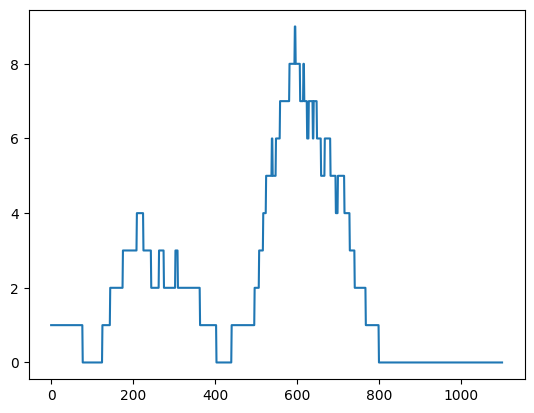

In [213]:
plt.plot(slider(R[:,10,0]))

In [242]:
#print(np.where(data["id_short"]==True))
trindex=np.array(np.where(data["id_short"]==True)).reshape(-1)
findex=np.array(np.where(data["id_short"]==False)).reshape(-1)    
print(findex.shape)

(450,)


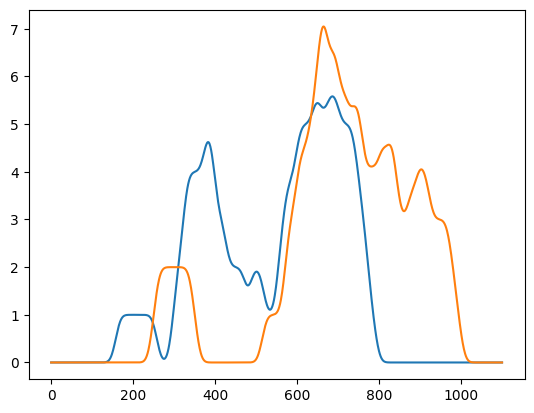

In [249]:
from scipy.ndimage import gaussian_filter1d
i=100
plt.plot(gaussian_filter1d(slider(R[:,10,trindex[i]]),10))
plt.plot(gaussian_filter1d(slider(R[:,10,findex[i]]),10))

In [208]:
from scipy.signal import find_peaks
a=find_peaks(gaussian_filter1d(slider(R[:,10,5]),20))
len(a[0])

6

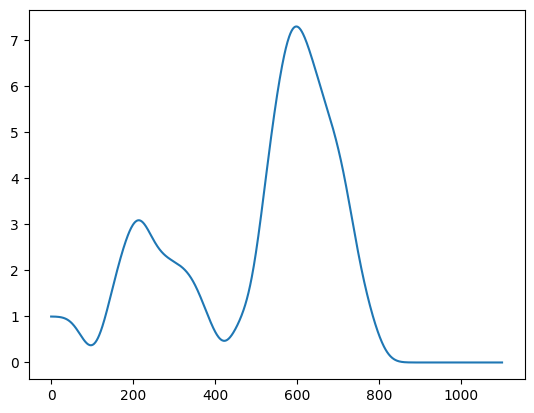

In [209]:
def pre_process(data):
    return gaussian_filter1d(slider(data),25)

plt.plot(pre_process(R[:,10,0]))

In [350]:
newR=np.zeros(shape=(1180,16,945))
print(newR.shape)

for i in range(16):
    for j in range(945):
        for tmp in range(1180):
            newR[tmp,i,j]=sum((R[tmp:tmp+20,i,j]))/2000
     

(1180, 16, 945)


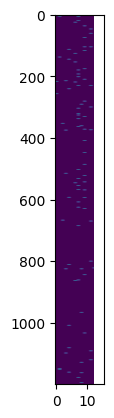

In [351]:
plt.imshow(R[:,:,findex[-1]],aspect=1/10)

(1180, 16, 945)

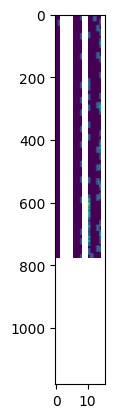

In [352]:
plt.imshow(newR[:,:,findex[0]],aspect=1/10)
slidedR=newR
slidedR.shape

/tmp/ipykernel_18299/2401049716.py:4: RuntimeWarning: Mean of empty slice
  newR[i,j,0]=np.nanmean(slidedR[i,j,trindex])


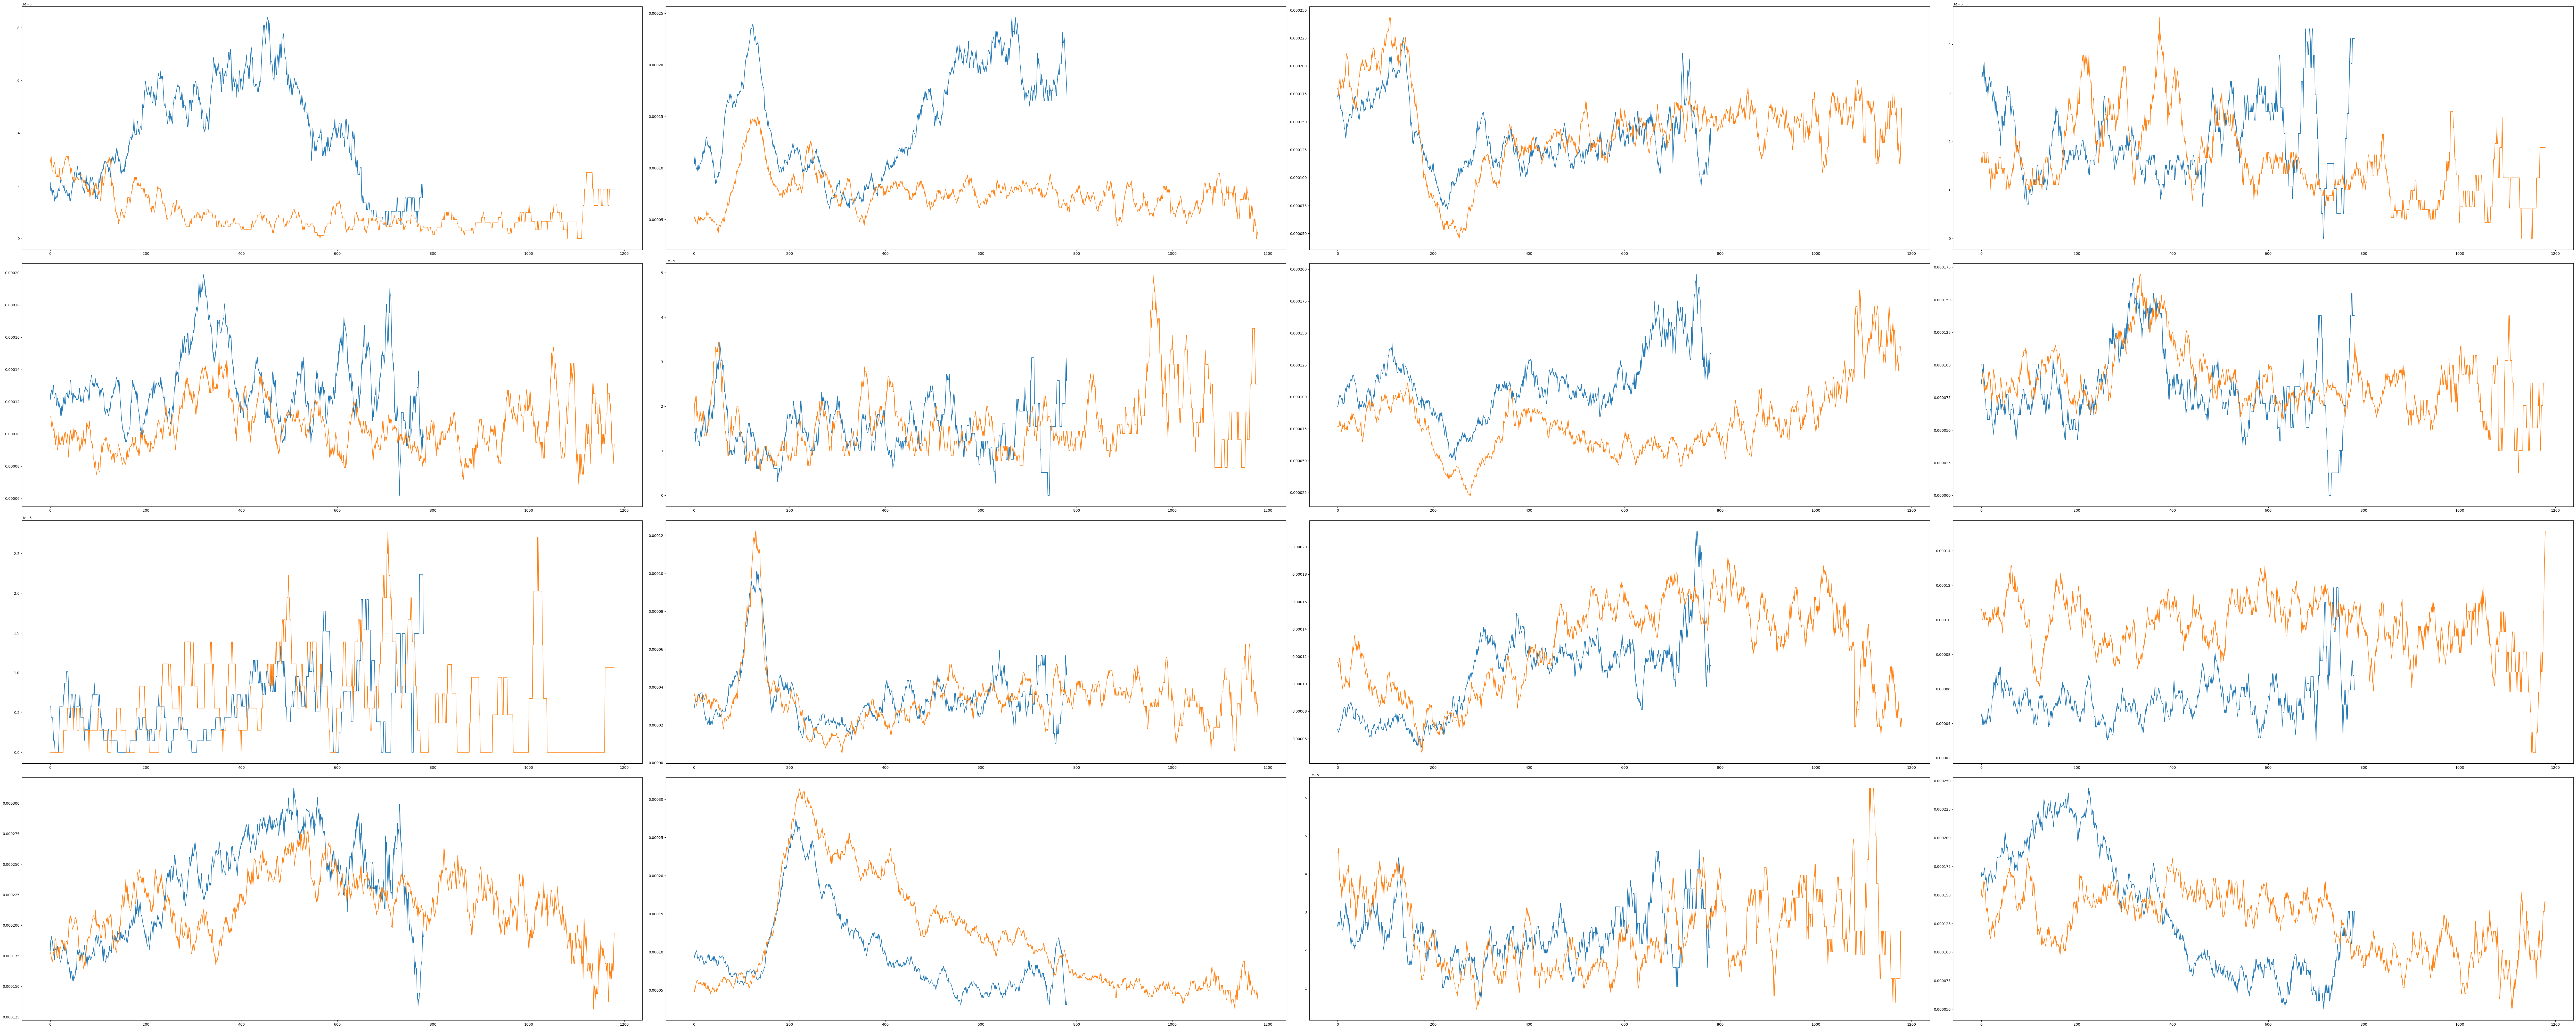

[[[2.12121212e-05 2.88888889e-05]
  [1.25252525e-04 1.11111111e-04]
  [5.79710145e-06 0.00000000e+00]
  ...
  [8.91472868e-05 1.00806452e-04]
  [4.39393939e-05 1.05970149e-04]
  [1.65775401e-04 1.54639175e-04]]

 [[1.81818182e-05 3.00000000e-05]
  [1.21212121e-04 1.11111111e-04]
  [5.79710145e-06 0.00000000e+00]
  ...
  [8.52713178e-05 1.00806452e-04]
  [4.54545455e-05 1.05970149e-04]
  [1.69786096e-04 1.49484536e-04]]

 [[1.91919192e-05 3.11111111e-05]
  [1.26262626e-04 1.07777778e-04]
  [4.34782609e-06 0.00000000e+00]
  ...
  [9.30232558e-05 9.47580645e-05]
  [4.39393939e-05 1.00000000e-04]
  [1.67112299e-04 1.47766323e-04]]

 ...

 [[           nan 1.87500000e-05]
  [           nan 8.12500000e-05]
  [           nan 1.06382979e-05]
  ...
  [           nan 8.62068966e-05]
  [           nan 1.27906977e-04]
  [           nan 1.35593220e-04]]

 [[           nan 1.87500000e-05]
  [           nan 8.75000000e-05]
  [           nan 1.06382979e-05]
  ...
  [           nan 8.62068966e-05]
  [ 

In [367]:
newR=np.zeros((1180,16,2)) # 0 is short 1 is long
for i in range(1180):
    for j in range(16):
        newR[i,j,0]=np.nanmean(slidedR[i,j,trindex])
for i in range(1180):
    for j in range(16):
        newR[i,j,1]=np.nanmean(slidedR[i,j,findex])
#plt.imshow(newR[:,:,1])
fig,ax=plt.subplots(nrows=4,ncols=4,figsize=(100,40))
tmp=0
for j in range(4):  
    for i in range(4):

        ax[i,j].plot(newR[:,tmp,0])
        ax[i,j].plot(newR[:,tmp,1])
        tmp+=1
plt.tight_layout()
plt.show()
#print(newR)

In [378]:
#ml to show if its short or long taking into account only first 300 tps
nans=np.isnan(newR[:,:,0])
newR[nans,0]=0
nans=np.isnan(newR[:,:,1])
newR[nans,1]=0
newR

array([[[2.12121212e-05, 2.88888889e-05],
        [1.25252525e-04, 1.11111111e-04],
        [5.79710145e-06, 0.00000000e+00],
        ...,
        [8.91472868e-05, 1.00806452e-04],
        [4.39393939e-05, 1.05970149e-04],
        [1.65775401e-04, 1.54639175e-04]],

       [[1.81818182e-05, 3.00000000e-05],
        [1.21212121e-04, 1.11111111e-04],
        [5.79710145e-06, 0.00000000e+00],
        ...,
        [8.52713178e-05, 1.00806452e-04],
        [4.54545455e-05, 1.05970149e-04],
        [1.69786096e-04, 1.49484536e-04]],

       [[1.91919192e-05, 3.11111111e-05],
        [1.26262626e-04, 1.07777778e-04],
        [4.34782609e-06, 0.00000000e+00],
        ...,
        [9.30232558e-05, 9.47580645e-05],
        [4.39393939e-05, 1.00000000e-04],
        [1.67112299e-04, 1.47766323e-04]],

       ...,

       [[0.00000000e+00, 1.87500000e-05],
        [0.00000000e+00, 8.12500000e-05],
        [0.00000000e+00, 1.06382979e-05],
        ...,
        [0.00000000e+00, 8.62068966e-05],
     

In [383]:
slidedR
nans=np.isnan(slidedR[:,:,:])

slidedR[nans]=0
slidedR.shape

(1180, 16, 945)

In [386]:
R_ml=np.zeros((1180,945))
for i in range(1180):
    for j in range(945):
        R_ml[i,j]=np.mean(slidedR[i,:,j])
    

In [405]:
data["t_s"].shape, R_ml.T.shape


((945,), (945, 1180))

(945,)


(1180, 300)

(945,)
(756, 500)
(756, 9)
Epoch 1/620
8/8 [==============================] - 1s 26ms/step - loss: 2.1963 - categorical_accuracy: 0.2077 - val_loss: 2.1955 - val_categorical_accuracy: 0.1852
Epoch 2/620
8/8 [==============================] - 0s 12ms/step - loss: 2.1941 - categorical_accuracy: 0.2169 - val_loss: 2.1936 - val_categorical_accuracy: 0.1852
Epoch 3/620
8/8 [==============================] - 0s 11ms/step - loss: 2.1913 - categorical_accuracy: 0.2169 - val_loss: 2.1916 - val_categorical_accuracy: 0.1852
Epoch 4/620
8/8 [==============================] - 0s 11ms/step - loss: 2.1884 - categorical_accuracy: 0.2169 - val_loss: 2.1893 - val_categorical_accuracy: 0.1852
Epoch 5/620
8/8 [==============================] - 0s 10ms/step - loss: 2.1847 - categorical_accuracy: 0.2169 - val_loss: 2.1864 - val_categorical_accuracy: 0.1852
Epoch 6/620
8/8 [==============================] - 0s 12ms/step - loss: 2.1806 - categorical_accuracy: 0.2169 - val_loss: 2.1830 - val_categorical_accura

8/8 [==============================] - 0s 10ms/step - loss: 2.1459 - categorical_accuracy: 0.2169 - val_loss: 2.1702 - val_categorical_accuracy: 0.1852
Epoch 51/620
8/8 [==============================] - 0s 10ms/step - loss: 2.1459 - categorical_accuracy: 0.2169 - val_loss: 2.1699 - val_categorical_accuracy: 0.1852
Epoch 52/620
8/8 [==============================] - 0s 9ms/step - loss: 2.1461 - categorical_accuracy: 0.2169 - val_loss: 2.1701 - val_categorical_accuracy: 0.1852
Epoch 53/620
8/8 [==============================] - 0s 9ms/step - loss: 2.1459 - categorical_accuracy: 0.2169 - val_loss: 2.1700 - val_categorical_accuracy: 0.1852
Epoch 54/620
8/8 [==============================] - 0s 9ms/step - loss: 2.1459 - categorical_accuracy: 0.2169 - val_loss: 2.1701 - val_categorical_accuracy: 0.1852
Epoch 55/620
8/8 [==============================] - 0s 9ms/step - loss: 2.1459 - categorical_accuracy: 0.2169 - val_loss: 2.1702 - val_categorical_accuracy: 0.1852
Epoch 56/620
8/8 [=========

Epoch 100/620
8/8 [==============================] - 0s 15ms/step - loss: 2.1456 - categorical_accuracy: 0.2169 - val_loss: 2.1698 - val_categorical_accuracy: 0.1852
Epoch 101/620
8/8 [==============================] - 0s 11ms/step - loss: 2.1457 - categorical_accuracy: 0.2169 - val_loss: 2.1700 - val_categorical_accuracy: 0.1852
Epoch 102/620
8/8 [==============================] - 0s 18ms/step - loss: 2.1457 - categorical_accuracy: 0.2169 - val_loss: 2.1701 - val_categorical_accuracy: 0.1852
Epoch 103/620
8/8 [==============================] - 0s 13ms/step - loss: 2.1457 - categorical_accuracy: 0.2169 - val_loss: 2.1699 - val_categorical_accuracy: 0.1852
Epoch 104/620
8/8 [==============================] - 0s 12ms/step - loss: 2.1457 - categorical_accuracy: 0.2169 - val_loss: 2.1698 - val_categorical_accuracy: 0.1852
Epoch 105/620
8/8 [==============================] - 0s 13ms/step - loss: 2.1458 - categorical_accuracy: 0.2169 - val_loss: 2.1705 - val_categorical_accuracy: 0.1852
Epoc

8/8 [==============================] - 0s 10ms/step - loss: 2.1454 - categorical_accuracy: 0.2169 - val_loss: 2.1698 - val_categorical_accuracy: 0.1852
Epoch 150/620
8/8 [==============================] - 0s 9ms/step - loss: 2.1454 - categorical_accuracy: 0.2169 - val_loss: 2.1694 - val_categorical_accuracy: 0.1852
Epoch 151/620
8/8 [==============================] - 0s 10ms/step - loss: 2.1453 - categorical_accuracy: 0.2169 - val_loss: 2.1696 - val_categorical_accuracy: 0.1852
Epoch 152/620
8/8 [==============================] - 0s 10ms/step - loss: 2.1453 - categorical_accuracy: 0.2169 - val_loss: 2.1697 - val_categorical_accuracy: 0.1852
Epoch 153/620
8/8 [==============================] - 0s 9ms/step - loss: 2.1453 - categorical_accuracy: 0.2169 - val_loss: 2.1701 - val_categorical_accuracy: 0.1852
Epoch 154/620
8/8 [==============================] - 0s 9ms/step - loss: 2.1453 - categorical_accuracy: 0.2169 - val_loss: 2.1700 - val_categorical_accuracy: 0.1852
Epoch 155/620
8/8 [==

8/8 [==============================] - 0s 10ms/step - loss: 2.1449 - categorical_accuracy: 0.2169 - val_loss: 2.1696 - val_categorical_accuracy: 0.1852
Epoch 199/620
8/8 [==============================] - 0s 10ms/step - loss: 2.1450 - categorical_accuracy: 0.2169 - val_loss: 2.1694 - val_categorical_accuracy: 0.1852
Epoch 200/620
8/8 [==============================] - 0s 10ms/step - loss: 2.1449 - categorical_accuracy: 0.2169 - val_loss: 2.1692 - val_categorical_accuracy: 0.1852
Epoch 201/620
8/8 [==============================] - 0s 9ms/step - loss: 2.1449 - categorical_accuracy: 0.2169 - val_loss: 2.1695 - val_categorical_accuracy: 0.1852
Epoch 202/620
8/8 [==============================] - 0s 9ms/step - loss: 2.1448 - categorical_accuracy: 0.2169 - val_loss: 2.1695 - val_categorical_accuracy: 0.1852
Epoch 203/620
8/8 [==============================] - 0s 9ms/step - loss: 2.1450 - categorical_accuracy: 0.2169 - val_loss: 2.1691 - val_categorical_accuracy: 0.1852
Epoch 204/620
8/8 [==

8/8 [==============================] - 0s 11ms/step - loss: 2.1443 - categorical_accuracy: 0.2169 - val_loss: 2.1690 - val_categorical_accuracy: 0.1852
Epoch 248/620
8/8 [==============================] - 0s 12ms/step - loss: 2.1444 - categorical_accuracy: 0.2169 - val_loss: 2.1697 - val_categorical_accuracy: 0.1852
Epoch 249/620
8/8 [==============================] - 0s 13ms/step - loss: 2.1443 - categorical_accuracy: 0.2169 - val_loss: 2.1695 - val_categorical_accuracy: 0.1852
Epoch 250/620
8/8 [==============================] - 0s 14ms/step - loss: 2.1444 - categorical_accuracy: 0.2169 - val_loss: 2.1700 - val_categorical_accuracy: 0.1852
Epoch 251/620
8/8 [==============================] - 0s 12ms/step - loss: 2.1442 - categorical_accuracy: 0.2169 - val_loss: 2.1693 - val_categorical_accuracy: 0.1852
Epoch 252/620
8/8 [==============================] - 0s 12ms/step - loss: 2.1441 - categorical_accuracy: 0.2169 - val_loss: 2.1687 - val_categorical_accuracy: 0.1852
Epoch 253/620
8/8 

8/8 [==============================] - 0s 12ms/step - loss: 2.1432 - categorical_accuracy: 0.2169 - val_loss: 2.1690 - val_categorical_accuracy: 0.1852
Epoch 297/620
8/8 [==============================] - 0s 13ms/step - loss: 2.1431 - categorical_accuracy: 0.2169 - val_loss: 2.1686 - val_categorical_accuracy: 0.1852
Epoch 298/620
8/8 [==============================] - 0s 14ms/step - loss: 2.1430 - categorical_accuracy: 0.2169 - val_loss: 2.1685 - val_categorical_accuracy: 0.1852
Epoch 299/620
8/8 [==============================] - 0s 13ms/step - loss: 2.1430 - categorical_accuracy: 0.2169 - val_loss: 2.1685 - val_categorical_accuracy: 0.1852
Epoch 300/620
8/8 [==============================] - 0s 12ms/step - loss: 2.1430 - categorical_accuracy: 0.2169 - val_loss: 2.1685 - val_categorical_accuracy: 0.1852
Epoch 301/620
8/8 [==============================] - 0s 11ms/step - loss: 2.1436 - categorical_accuracy: 0.2169 - val_loss: 2.1693 - val_categorical_accuracy: 0.1852
Epoch 302/620
8/8 

8/8 [==============================] - 0s 10ms/step - loss: 2.1400 - categorical_accuracy: 0.2169 - val_loss: 2.1672 - val_categorical_accuracy: 0.1852
Epoch 346/620
8/8 [==============================] - 0s 9ms/step - loss: 2.1400 - categorical_accuracy: 0.2169 - val_loss: 2.1666 - val_categorical_accuracy: 0.1852
Epoch 347/620
8/8 [==============================] - 0s 10ms/step - loss: 2.1398 - categorical_accuracy: 0.2169 - val_loss: 2.1669 - val_categorical_accuracy: 0.1852
Epoch 348/620
8/8 [==============================] - 0s 10ms/step - loss: 2.1397 - categorical_accuracy: 0.2169 - val_loss: 2.1672 - val_categorical_accuracy: 0.1852
Epoch 349/620
8/8 [==============================] - 0s 9ms/step - loss: 2.1394 - categorical_accuracy: 0.2169 - val_loss: 2.1665 - val_categorical_accuracy: 0.1852
Epoch 350/620
8/8 [==============================] - 0s 14ms/step - loss: 2.1393 - categorical_accuracy: 0.2169 - val_loss: 2.1658 - val_categorical_accuracy: 0.1852
Epoch 351/620
8/8 [=

8/8 [==============================] - 0s 13ms/step - loss: 2.1195 - categorical_accuracy: 0.2169 - val_loss: 2.1502 - val_categorical_accuracy: 0.1852
Epoch 395/620
8/8 [==============================] - 0s 11ms/step - loss: 2.1193 - categorical_accuracy: 0.2169 - val_loss: 2.1495 - val_categorical_accuracy: 0.1852
Epoch 396/620
8/8 [==============================] - 0s 10ms/step - loss: 2.1178 - categorical_accuracy: 0.2169 - val_loss: 2.1487 - val_categorical_accuracy: 0.1852
Epoch 397/620
8/8 [==============================] - 0s 11ms/step - loss: 2.1176 - categorical_accuracy: 0.2169 - val_loss: 2.1481 - val_categorical_accuracy: 0.1852
Epoch 398/620
8/8 [==============================] - 0s 11ms/step - loss: 2.1146 - categorical_accuracy: 0.2169 - val_loss: 2.1461 - val_categorical_accuracy: 0.1852
Epoch 399/620
8/8 [==============================] - 0s 10ms/step - loss: 2.1141 - categorical_accuracy: 0.2169 - val_loss: 2.1437 - val_categorical_accuracy: 0.1852
Epoch 400/620
8/8 

8/8 [==============================] - 0s 14ms/step - loss: 1.9598 - categorical_accuracy: 0.3241 - val_loss: 1.9933 - val_categorical_accuracy: 0.2751
Epoch 444/620
8/8 [==============================] - 0s 13ms/step - loss: 1.9481 - categorical_accuracy: 0.3254 - val_loss: 1.9883 - val_categorical_accuracy: 0.2963
Epoch 445/620
8/8 [==============================] - 0s 13ms/step - loss: 1.9432 - categorical_accuracy: 0.3214 - val_loss: 1.9837 - val_categorical_accuracy: 0.2963
Epoch 446/620
8/8 [==============================] - 0s 13ms/step - loss: 1.9368 - categorical_accuracy: 0.3280 - val_loss: 1.9833 - val_categorical_accuracy: 0.2751
Epoch 447/620
8/8 [==============================] - 0s 11ms/step - loss: 1.9391 - categorical_accuracy: 0.3201 - val_loss: 1.9803 - val_categorical_accuracy: 0.2963
Epoch 448/620
8/8 [==============================] - 0s 10ms/step - loss: 1.9317 - categorical_accuracy: 0.3161 - val_loss: 1.9696 - val_categorical_accuracy: 0.2963
Epoch 449/620
8/8 

8/8 [==============================] - 0s 12ms/step - loss: 1.8328 - categorical_accuracy: 0.3267 - val_loss: 1.8645 - val_categorical_accuracy: 0.2910
Epoch 493/620
8/8 [==============================] - 0s 10ms/step - loss: 1.8331 - categorical_accuracy: 0.3254 - val_loss: 1.8733 - val_categorical_accuracy: 0.3016
Epoch 494/620
8/8 [==============================] - 0s 10ms/step - loss: 1.8317 - categorical_accuracy: 0.3267 - val_loss: 1.8640 - val_categorical_accuracy: 0.2963
Epoch 495/620
8/8 [==============================] - 0s 11ms/step - loss: 1.8294 - categorical_accuracy: 0.3294 - val_loss: 1.8612 - val_categorical_accuracy: 0.2963
Epoch 496/620
8/8 [==============================] - 0s 11ms/step - loss: 1.8287 - categorical_accuracy: 0.3294 - val_loss: 1.8614 - val_categorical_accuracy: 0.2963
Epoch 497/620
8/8 [==============================] - 0s 14ms/step - loss: 1.8274 - categorical_accuracy: 0.3267 - val_loss: 1.8629 - val_categorical_accuracy: 0.2963
Epoch 498/620
8/8 

8/8 [==============================] - 0s 11ms/step - loss: 1.8097 - categorical_accuracy: 0.3294 - val_loss: 1.8402 - val_categorical_accuracy: 0.2963
Epoch 542/620
8/8 [==============================] - 0s 11ms/step - loss: 1.8049 - categorical_accuracy: 0.3294 - val_loss: 1.8466 - val_categorical_accuracy: 0.3016
Epoch 543/620
8/8 [==============================] - 0s 10ms/step - loss: 1.8064 - categorical_accuracy: 0.3280 - val_loss: 1.8405 - val_categorical_accuracy: 0.2963
Epoch 544/620
8/8 [==============================] - 0s 10ms/step - loss: 1.8046 - categorical_accuracy: 0.3294 - val_loss: 1.8408 - val_categorical_accuracy: 0.3016
Epoch 545/620
8/8 [==============================] - 0s 10ms/step - loss: 1.8036 - categorical_accuracy: 0.3294 - val_loss: 1.8396 - val_categorical_accuracy: 0.2963
Epoch 546/620
8/8 [==============================] - 0s 10ms/step - loss: 1.8037 - categorical_accuracy: 0.3280 - val_loss: 1.8571 - val_categorical_accuracy: 0.3016
Epoch 547/620
8/8 

8/8 [==============================] - 0s 9ms/step - loss: 1.7979 - categorical_accuracy: 0.3333 - val_loss: 1.8417 - val_categorical_accuracy: 0.2910
Epoch 591/620
8/8 [==============================] - 0s 10ms/step - loss: 1.7986 - categorical_accuracy: 0.3280 - val_loss: 1.8347 - val_categorical_accuracy: 0.3122
Epoch 592/620
8/8 [==============================] - 0s 14ms/step - loss: 1.7930 - categorical_accuracy: 0.3307 - val_loss: 1.8340 - val_categorical_accuracy: 0.3122
Epoch 593/620
8/8 [==============================] - 0s 10ms/step - loss: 1.7952 - categorical_accuracy: 0.3307 - val_loss: 1.8333 - val_categorical_accuracy: 0.3069
Epoch 594/620
8/8 [==============================] - 0s 10ms/step - loss: 1.7922 - categorical_accuracy: 0.3320 - val_loss: 1.8339 - val_categorical_accuracy: 0.3069
Epoch 595/620
8/8 [==============================] - 0s 9ms/step - loss: 1.7914 - categorical_accuracy: 0.3320 - val_loss: 1.8332 - val_categorical_accuracy: 0.3069
Epoch 596/620
8/8 [=

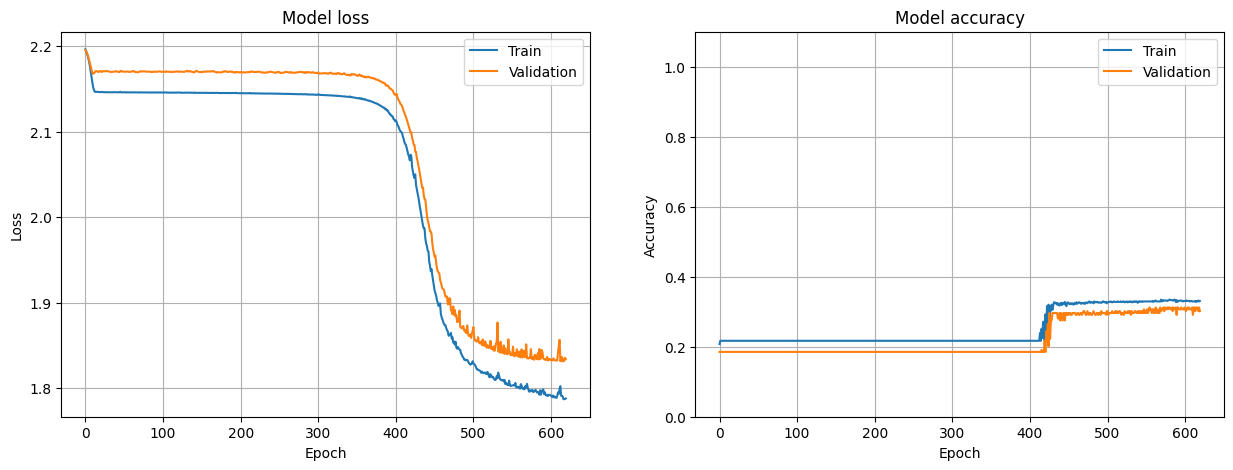

In [497]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses     import categorical_crossentropy
from tensorflow.keras.metrics    import categorical_accuracy
import pandas as pd
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical

# tensorflow
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
import tensorflow as tf
time_trials=500
inp      = Input((time_trials,))
layer1   = Dense(512, activation="relu") (inp)
layer2   = Dense(64, activation="relu") (layer1)
layer3   = Dense(264,activation="relu")   (layer2)
layer4   = Dense(100,activation="linear")  (layer3)
out      = Dense(9, activation="softmax") (layer4)

model = Model(inputs=inp,outputs=out)
print(data["t_s"].shape)
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
y = onehotencoder.fit_transform(data["t_s"].reshape(-1,1)).toarray()
R_ml[:,:300].shape

model.compile(Adam(learning_rate=1e-4), categorical_crossentropy, categorical_accuracy)
#print(enc.shape, R.shape)

X_test,X_val,y_test,y_val=train_test_split(R_ml[:time_trials,:].T,y,test_size=0.2)
#print(enc)
print(X_test.shape)
print(y_test.shape)
H = model.fit(
    X_test, 
    y_test,
    validation_data=(X_val,y_val),
    batch_size=100,
    epochs= 620
)
import matplotlib.pyplot as plt

def learning_curves(H):
  # Plot training & validation loss values
  f = plt.figure(figsize=(15,5))
  ax = f.add_subplot(121)
  ax2 = f.add_subplot(122)

  ax.plot(H.history['loss'])
  ax.plot(H.history['val_loss'])
  ax.set_title('Model loss')
  ax.set_ylabel('Loss')
  ax.set_xlabel('Epoch')
  ax.legend(['Train', 'Validation'])
  ax.grid(True)


  # Plot training & validation accuracy values
  ax2.plot(H.history['categorical_accuracy'])
  ax2.plot(H.history['val_categorical_accuracy'])
  ax2.set_title('Model accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylim((0,1.1))
  ax2.legend(['Train', 'Validation'])
  ax2.grid(True)


learning_curves(H)

(945,)
(756, 700)
(756, 9)
Epoch 1/620
8/8 [==============================] - 1s 24ms/step - loss: 2.1964 - categorical_accuracy: 0.2024 - val_loss: 2.1961 - val_categorical_accuracy: 0.1852
Epoch 2/620
8/8 [==============================] - 0s 11ms/step - loss: 2.1942 - categorical_accuracy: 0.2169 - val_loss: 2.1950 - val_categorical_accuracy: 0.1852
Epoch 3/620
8/8 [==============================] - 0s 11ms/step - loss: 2.1916 - categorical_accuracy: 0.2169 - val_loss: 2.1936 - val_categorical_accuracy: 0.1852
Epoch 4/620
8/8 [==============================] - 0s 11ms/step - loss: 2.1884 - categorical_accuracy: 0.2169 - val_loss: 2.1922 - val_categorical_accuracy: 0.1852
Epoch 5/620
8/8 [==============================] - 0s 10ms/step - loss: 2.1851 - categorical_accuracy: 0.2169 - val_loss: 2.1903 - val_categorical_accuracy: 0.1852
Epoch 6/620
8/8 [==============================] - 0s 10ms/step - loss: 2.1805 - categorical_accuracy: 0.2169 - val_loss: 2.1885 - val_categorical_accura

8/8 [==============================] - 0s 10ms/step - loss: 2.1409 - categorical_accuracy: 0.2169 - val_loss: 2.2002 - val_categorical_accuracy: 0.1852
Epoch 51/620
8/8 [==============================] - 0s 10ms/step - loss: 2.1411 - categorical_accuracy: 0.2169 - val_loss: 2.2016 - val_categorical_accuracy: 0.1852
Epoch 52/620
8/8 [==============================] - 0s 10ms/step - loss: 2.1408 - categorical_accuracy: 0.2169 - val_loss: 2.2011 - val_categorical_accuracy: 0.1852
Epoch 53/620
8/8 [==============================] - 0s 10ms/step - loss: 2.1408 - categorical_accuracy: 0.2169 - val_loss: 2.2007 - val_categorical_accuracy: 0.1852
Epoch 54/620
8/8 [==============================] - 0s 12ms/step - loss: 2.1409 - categorical_accuracy: 0.2169 - val_loss: 2.2007 - val_categorical_accuracy: 0.1852
Epoch 55/620
8/8 [==============================] - 0s 13ms/step - loss: 2.1408 - categorical_accuracy: 0.2169 - val_loss: 2.2005 - val_categorical_accuracy: 0.1852
Epoch 56/620
8/8 [=====

Epoch 100/620
8/8 [==============================] - 0s 10ms/step - loss: 2.1369 - categorical_accuracy: 0.2169 - val_loss: 2.1946 - val_categorical_accuracy: 0.1852
Epoch 101/620
8/8 [==============================] - 0s 13ms/step - loss: 2.1367 - categorical_accuracy: 0.2169 - val_loss: 2.1959 - val_categorical_accuracy: 0.1852
Epoch 102/620
8/8 [==============================] - 0s 12ms/step - loss: 2.1364 - categorical_accuracy: 0.2169 - val_loss: 2.1943 - val_categorical_accuracy: 0.1852
Epoch 103/620
8/8 [==============================] - 0s 12ms/step - loss: 2.1359 - categorical_accuracy: 0.2169 - val_loss: 2.1943 - val_categorical_accuracy: 0.1852
Epoch 104/620
8/8 [==============================] - 0s 10ms/step - loss: 2.1358 - categorical_accuracy: 0.2169 - val_loss: 2.1938 - val_categorical_accuracy: 0.1852
Epoch 105/620
8/8 [==============================] - 0s 11ms/step - loss: 2.1352 - categorical_accuracy: 0.2169 - val_loss: 2.1936 - val_categorical_accuracy: 0.1852
Epoc

8/8 [==============================] - 0s 11ms/step - loss: 1.8794 - categorical_accuracy: 0.3280 - val_loss: 1.9526 - val_categorical_accuracy: 0.2857
Epoch 150/620
8/8 [==============================] - 0s 11ms/step - loss: 1.8608 - categorical_accuracy: 0.3254 - val_loss: 1.9194 - val_categorical_accuracy: 0.3016
Epoch 151/620
8/8 [==============================] - 0s 19ms/step - loss: 1.8387 - categorical_accuracy: 0.3280 - val_loss: 1.9079 - val_categorical_accuracy: 0.2910
Epoch 152/620
8/8 [==============================] - 0s 10ms/step - loss: 1.8238 - categorical_accuracy: 0.3254 - val_loss: 1.8866 - val_categorical_accuracy: 0.2963
Epoch 153/620
8/8 [==============================] - 0s 12ms/step - loss: 1.8068 - categorical_accuracy: 0.3241 - val_loss: 1.8701 - val_categorical_accuracy: 0.2963
Epoch 154/620
8/8 [==============================] - 0s 12ms/step - loss: 1.7914 - categorical_accuracy: 0.3267 - val_loss: 1.8569 - val_categorical_accuracy: 0.2910
Epoch 155/620
8/8 

8/8 [==============================] - 0s 10ms/step - loss: 1.5171 - categorical_accuracy: 0.4577 - val_loss: 1.6401 - val_categorical_accuracy: 0.3492
Epoch 199/620
8/8 [==============================] - 0s 11ms/step - loss: 1.5110 - categorical_accuracy: 0.4497 - val_loss: 1.6298 - val_categorical_accuracy: 0.3810
Epoch 200/620
8/8 [==============================] - 0s 13ms/step - loss: 1.5063 - categorical_accuracy: 0.4590 - val_loss: 1.6309 - val_categorical_accuracy: 0.3757
Epoch 201/620
8/8 [==============================] - 0s 12ms/step - loss: 1.5047 - categorical_accuracy: 0.4563 - val_loss: 1.6338 - val_categorical_accuracy: 0.3545
Epoch 202/620
8/8 [==============================] - 0s 11ms/step - loss: 1.5023 - categorical_accuracy: 0.4577 - val_loss: 1.6281 - val_categorical_accuracy: 0.3704
Epoch 203/620
8/8 [==============================] - 0s 10ms/step - loss: 1.5003 - categorical_accuracy: 0.4524 - val_loss: 1.6258 - val_categorical_accuracy: 0.3492
Epoch 204/620
8/8 

8/8 [==============================] - 0s 15ms/step - loss: 1.4274 - categorical_accuracy: 0.4749 - val_loss: 1.5613 - val_categorical_accuracy: 0.3810
Epoch 248/620
8/8 [==============================] - 0s 12ms/step - loss: 1.4203 - categorical_accuracy: 0.4749 - val_loss: 1.5614 - val_categorical_accuracy: 0.3757
Epoch 249/620
8/8 [==============================] - 0s 13ms/step - loss: 1.4181 - categorical_accuracy: 0.4828 - val_loss: 1.5659 - val_categorical_accuracy: 0.3757
Epoch 250/620
8/8 [==============================] - 0s 12ms/step - loss: 1.4271 - categorical_accuracy: 0.4709 - val_loss: 1.5585 - val_categorical_accuracy: 0.3757
Epoch 251/620
8/8 [==============================] - 0s 11ms/step - loss: 1.4172 - categorical_accuracy: 0.4815 - val_loss: 1.5514 - val_categorical_accuracy: 0.3810
Epoch 252/620
8/8 [==============================] - 0s 13ms/step - loss: 1.4153 - categorical_accuracy: 0.4802 - val_loss: 1.5524 - val_categorical_accuracy: 0.3862
Epoch 253/620
8/8 

8/8 [==============================] - 0s 14ms/step - loss: 1.3684 - categorical_accuracy: 0.4947 - val_loss: 1.5142 - val_categorical_accuracy: 0.3968
Epoch 297/620
8/8 [==============================] - 0s 13ms/step - loss: 1.3657 - categorical_accuracy: 0.4934 - val_loss: 1.5130 - val_categorical_accuracy: 0.3862
Epoch 298/620
8/8 [==============================] - 0s 12ms/step - loss: 1.3657 - categorical_accuracy: 0.5000 - val_loss: 1.5179 - val_categorical_accuracy: 0.3810
Epoch 299/620
8/8 [==============================] - 0s 10ms/step - loss: 1.3651 - categorical_accuracy: 0.4921 - val_loss: 1.5180 - val_categorical_accuracy: 0.3810
Epoch 300/620
8/8 [==============================] - 0s 10ms/step - loss: 1.3647 - categorical_accuracy: 0.4960 - val_loss: 1.5125 - val_categorical_accuracy: 0.3810
Epoch 301/620
8/8 [==============================] - 0s 13ms/step - loss: 1.3644 - categorical_accuracy: 0.4894 - val_loss: 1.5104 - val_categorical_accuracy: 0.3862
Epoch 302/620
8/8 

8/8 [==============================] - 0s 12ms/step - loss: 1.3382 - categorical_accuracy: 0.4987 - val_loss: 1.4955 - val_categorical_accuracy: 0.4021
Epoch 346/620
8/8 [==============================] - 0s 10ms/step - loss: 1.3387 - categorical_accuracy: 0.5026 - val_loss: 1.4940 - val_categorical_accuracy: 0.3757
Epoch 347/620
8/8 [==============================] - 0s 11ms/step - loss: 1.3273 - categorical_accuracy: 0.5106 - val_loss: 1.4841 - val_categorical_accuracy: 0.4074
Epoch 348/620
8/8 [==============================] - 0s 13ms/step - loss: 1.3273 - categorical_accuracy: 0.5132 - val_loss: 1.4833 - val_categorical_accuracy: 0.3968
Epoch 349/620
8/8 [==============================] - 0s 12ms/step - loss: 1.3269 - categorical_accuracy: 0.5079 - val_loss: 1.4769 - val_categorical_accuracy: 0.3915
Epoch 350/620
8/8 [==============================] - 0s 10ms/step - loss: 1.3228 - categorical_accuracy: 0.5159 - val_loss: 1.4773 - val_categorical_accuracy: 0.3968
Epoch 351/620
8/8 

8/8 [==============================] - 0s 12ms/step - loss: 1.2957 - categorical_accuracy: 0.5172 - val_loss: 1.4526 - val_categorical_accuracy: 0.4127
Epoch 395/620
8/8 [==============================] - 0s 12ms/step - loss: 1.3014 - categorical_accuracy: 0.5172 - val_loss: 1.4495 - val_categorical_accuracy: 0.4074
Epoch 396/620
8/8 [==============================] - 0s 11ms/step - loss: 1.3043 - categorical_accuracy: 0.5066 - val_loss: 1.4567 - val_categorical_accuracy: 0.4021
Epoch 397/620
8/8 [==============================] - 0s 14ms/step - loss: 1.3027 - categorical_accuracy: 0.5119 - val_loss: 1.4522 - val_categorical_accuracy: 0.4074
Epoch 398/620
8/8 [==============================] - 0s 13ms/step - loss: 1.2938 - categorical_accuracy: 0.5225 - val_loss: 1.4485 - val_categorical_accuracy: 0.4074
Epoch 399/620
8/8 [==============================] - 0s 12ms/step - loss: 1.2953 - categorical_accuracy: 0.5198 - val_loss: 1.4506 - val_categorical_accuracy: 0.4021
Epoch 400/620
8/8 

8/8 [==============================] - 0s 16ms/step - loss: 1.2773 - categorical_accuracy: 0.5172 - val_loss: 1.4361 - val_categorical_accuracy: 0.4127
Epoch 444/620
8/8 [==============================] - 0s 14ms/step - loss: 1.2747 - categorical_accuracy: 0.5265 - val_loss: 1.4349 - val_categorical_accuracy: 0.4074
Epoch 445/620
8/8 [==============================] - 0s 12ms/step - loss: 1.2705 - categorical_accuracy: 0.5265 - val_loss: 1.4399 - val_categorical_accuracy: 0.4127
Epoch 446/620
8/8 [==============================] - 0s 11ms/step - loss: 1.2706 - categorical_accuracy: 0.5278 - val_loss: 1.4314 - val_categorical_accuracy: 0.4074
Epoch 447/620
8/8 [==============================] - 0s 14ms/step - loss: 1.2697 - categorical_accuracy: 0.5291 - val_loss: 1.4327 - val_categorical_accuracy: 0.4074
Epoch 448/620
8/8 [==============================] - 0s 15ms/step - loss: 1.2708 - categorical_accuracy: 0.5265 - val_loss: 1.4343 - val_categorical_accuracy: 0.4127
Epoch 449/620
8/8 

8/8 [==============================] - 0s 13ms/step - loss: 1.2506 - categorical_accuracy: 0.5344 - val_loss: 1.4211 - val_categorical_accuracy: 0.4074
Epoch 493/620
8/8 [==============================] - 0s 10ms/step - loss: 1.2509 - categorical_accuracy: 0.5304 - val_loss: 1.4193 - val_categorical_accuracy: 0.4021
Epoch 494/620
8/8 [==============================] - 0s 10ms/step - loss: 1.2499 - categorical_accuracy: 0.5357 - val_loss: 1.4176 - val_categorical_accuracy: 0.4127
Epoch 495/620
8/8 [==============================] - 0s 10ms/step - loss: 1.2511 - categorical_accuracy: 0.5331 - val_loss: 1.4234 - val_categorical_accuracy: 0.4127
Epoch 496/620
8/8 [==============================] - 0s 10ms/step - loss: 1.2500 - categorical_accuracy: 0.5304 - val_loss: 1.4187 - val_categorical_accuracy: 0.4074
Epoch 497/620
8/8 [==============================] - 0s 11ms/step - loss: 1.2513 - categorical_accuracy: 0.5344 - val_loss: 1.4226 - val_categorical_accuracy: 0.4180
Epoch 498/620
8/8 

8/8 [==============================] - 0s 11ms/step - loss: 1.2337 - categorical_accuracy: 0.5384 - val_loss: 1.4006 - val_categorical_accuracy: 0.4074
Epoch 542/620
8/8 [==============================] - 0s 10ms/step - loss: 1.2362 - categorical_accuracy: 0.5344 - val_loss: 1.4056 - val_categorical_accuracy: 0.4074
Epoch 543/620
8/8 [==============================] - 0s 10ms/step - loss: 1.2317 - categorical_accuracy: 0.5397 - val_loss: 1.4175 - val_categorical_accuracy: 0.4127
Epoch 544/620
8/8 [==============================] - 0s 10ms/step - loss: 1.2346 - categorical_accuracy: 0.5357 - val_loss: 1.4150 - val_categorical_accuracy: 0.4180
Epoch 545/620
8/8 [==============================] - 0s 10ms/step - loss: 1.2374 - categorical_accuracy: 0.5304 - val_loss: 1.4073 - val_categorical_accuracy: 0.4127
Epoch 546/620
8/8 [==============================] - 0s 10ms/step - loss: 1.2313 - categorical_accuracy: 0.5410 - val_loss: 1.4011 - val_categorical_accuracy: 0.4127
Epoch 547/620
8/8 

8/8 [==============================] - 0s 10ms/step - loss: 1.2183 - categorical_accuracy: 0.5423 - val_loss: 1.3893 - val_categorical_accuracy: 0.4127
Epoch 591/620
8/8 [==============================] - 0s 10ms/step - loss: 1.2182 - categorical_accuracy: 0.5423 - val_loss: 1.3903 - val_categorical_accuracy: 0.4127
Epoch 592/620
8/8 [==============================] - 0s 11ms/step - loss: 1.2170 - categorical_accuracy: 0.5437 - val_loss: 1.3967 - val_categorical_accuracy: 0.4180
Epoch 593/620
8/8 [==============================] - 0s 10ms/step - loss: 1.2180 - categorical_accuracy: 0.5450 - val_loss: 1.4033 - val_categorical_accuracy: 0.4233
Epoch 594/620
8/8 [==============================] - 0s 10ms/step - loss: 1.2157 - categorical_accuracy: 0.5476 - val_loss: 1.3973 - val_categorical_accuracy: 0.4233
Epoch 595/620
8/8 [==============================] - 0s 10ms/step - loss: 1.2214 - categorical_accuracy: 0.5331 - val_loss: 1.3933 - val_categorical_accuracy: 0.4180
Epoch 596/620
8/8 

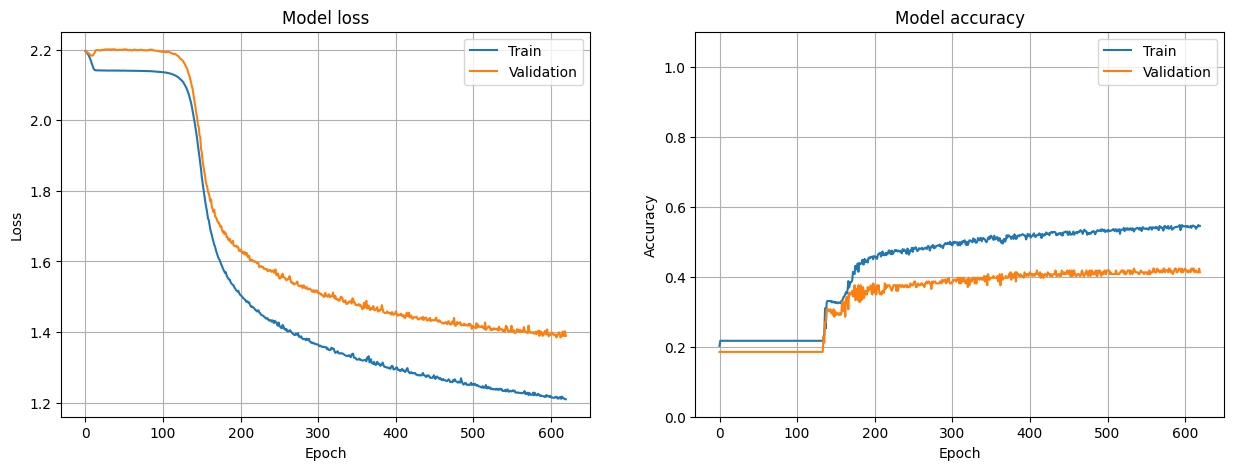

In [492]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses     import categorical_crossentropy
from tensorflow.keras.metrics    import categorical_accuracy
import pandas as pd
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical

# tensorflow
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
import tensorflow as tf
time_trials=700
inp      = Input((time_trials,))
layer1   = Dense(512, activation="relu") (inp)
layer2   = Dense(64, activation="relu") (layer1)
layer3   = Dense(264,activation="relu")   (layer2)
layer4   = Dense(100,activation="linear")  (layer3)
out      = Dense(9, activation="softmax") (layer4)

model = Model(inputs=inp,outputs=out)
print(data["t_s"].shape)
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
y = onehotencoder.fit_transform(data["t_s"].reshape(-1,1)).toarray()
R_ml[:,:300].shape

model.compile(Adam(learning_rate=1e-4), categorical_crossentropy, categorical_accuracy)
#print(enc.shape, R.shape)

X_test,X_val,y_test,y_val=train_test_split(R_ml[:time_trials,:].T,y,test_size=0.2)
#print(enc)
print(X_test.shape)
print(y_test.shape)
H = model.fit(
    X_test, 
    y_test,
    validation_data=(X_val,y_val),
    batch_size=100,
    epochs= 620
)
import matplotlib.pyplot as plt

def learning_curves(H):
  # Plot training & validation loss values
  f = plt.figure(figsize=(15,5))
  ax = f.add_subplot(121)
  ax2 = f.add_subplot(122)

  ax.plot(H.history['loss'])
  ax.plot(H.history['val_loss'])
  ax.set_title('Model loss')
  ax.set_ylabel('Loss')
  ax.set_xlabel('Epoch')
  ax.legend(['Train', 'Validation'])
  ax.grid(True)


  # Plot training & validation accuracy values
  ax2.plot(H.history['categorical_accuracy'])
  ax2.plot(H.history['val_categorical_accuracy'])
  ax2.set_title('Model accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylim((0,1.1))
  ax2.legend(['Train', 'Validation'])
  ax2.grid(True)


learning_curves(H)

(945,)
(756, 800)
(756, 9)
Epoch 1/620
8/8 [==============================] - 1s 32ms/step - loss: 2.1967 - categorical_accuracy: 0.1984 - val_loss: 2.1963 - val_categorical_accuracy: 0.1852
Epoch 2/620
8/8 [==============================] - 0s 13ms/step - loss: 2.1948 - categorical_accuracy: 0.2169 - val_loss: 2.1952 - val_categorical_accuracy: 0.1852
Epoch 3/620
8/8 [==============================] - 0s 12ms/step - loss: 2.1925 - categorical_accuracy: 0.2169 - val_loss: 2.1938 - val_categorical_accuracy: 0.1852
Epoch 4/620
8/8 [==============================] - 0s 13ms/step - loss: 2.1900 - categorical_accuracy: 0.2169 - val_loss: 2.1920 - val_categorical_accuracy: 0.1852
Epoch 5/620
8/8 [==============================] - 0s 12ms/step - loss: 2.1864 - categorical_accuracy: 0.2169 - val_loss: 2.1900 - val_categorical_accuracy: 0.1852
Epoch 6/620
8/8 [==============================] - 0s 13ms/step - loss: 2.1820 - categorical_accuracy: 0.2169 - val_loss: 2.1877 - val_categorical_accura

8/8 [==============================] - 0s 12ms/step - loss: 2.1411 - categorical_accuracy: 0.2169 - val_loss: 2.1875 - val_categorical_accuracy: 0.1852
Epoch 51/620
8/8 [==============================] - 0s 14ms/step - loss: 2.1409 - categorical_accuracy: 0.2169 - val_loss: 2.1879 - val_categorical_accuracy: 0.1852
Epoch 52/620
8/8 [==============================] - 0s 11ms/step - loss: 2.1407 - categorical_accuracy: 0.2169 - val_loss: 2.1872 - val_categorical_accuracy: 0.1852
Epoch 53/620
8/8 [==============================] - 0s 11ms/step - loss: 2.1408 - categorical_accuracy: 0.2169 - val_loss: 2.1865 - val_categorical_accuracy: 0.1852
Epoch 54/620
8/8 [==============================] - 0s 11ms/step - loss: 2.1406 - categorical_accuracy: 0.2169 - val_loss: 2.1871 - val_categorical_accuracy: 0.1852
Epoch 55/620
8/8 [==============================] - 0s 11ms/step - loss: 2.1406 - categorical_accuracy: 0.2169 - val_loss: 2.1873 - val_categorical_accuracy: 0.1852
Epoch 56/620
8/8 [=====

Epoch 100/620
8/8 [==============================] - 0s 12ms/step - loss: 2.1034 - categorical_accuracy: 0.2169 - val_loss: 2.1482 - val_categorical_accuracy: 0.1852
Epoch 101/620
8/8 [==============================] - 0s 11ms/step - loss: 2.0994 - categorical_accuracy: 0.2169 - val_loss: 2.1439 - val_categorical_accuracy: 0.1852
Epoch 102/620
8/8 [==============================] - 0s 12ms/step - loss: 2.0953 - categorical_accuracy: 0.2169 - val_loss: 2.1389 - val_categorical_accuracy: 0.1852
Epoch 103/620
8/8 [==============================] - 0s 11ms/step - loss: 2.0902 - categorical_accuracy: 0.2169 - val_loss: 2.1344 - val_categorical_accuracy: 0.1852
Epoch 104/620
8/8 [==============================] - 0s 11ms/step - loss: 2.0834 - categorical_accuracy: 0.2169 - val_loss: 2.1291 - val_categorical_accuracy: 0.1852
Epoch 105/620
8/8 [==============================] - 0s 11ms/step - loss: 2.0771 - categorical_accuracy: 0.2169 - val_loss: 2.1237 - val_categorical_accuracy: 0.1852
Epoc

8/8 [==============================] - 0s 13ms/step - loss: 1.4919 - categorical_accuracy: 0.4616 - val_loss: 1.5628 - val_categorical_accuracy: 0.3915
Epoch 150/620
8/8 [==============================] - 0s 12ms/step - loss: 1.4859 - categorical_accuracy: 0.4590 - val_loss: 1.5542 - val_categorical_accuracy: 0.3862
Epoch 151/620
8/8 [==============================] - 0s 11ms/step - loss: 1.4798 - categorical_accuracy: 0.4590 - val_loss: 1.5530 - val_categorical_accuracy: 0.3862
Epoch 152/620
8/8 [==============================] - 0s 12ms/step - loss: 1.4744 - categorical_accuracy: 0.4683 - val_loss: 1.5479 - val_categorical_accuracy: 0.3862
Epoch 153/620
8/8 [==============================] - 0s 11ms/step - loss: 1.4683 - categorical_accuracy: 0.4537 - val_loss: 1.5399 - val_categorical_accuracy: 0.3810
Epoch 154/620
8/8 [==============================] - 0s 12ms/step - loss: 1.4714 - categorical_accuracy: 0.4484 - val_loss: 1.5360 - val_categorical_accuracy: 0.3757
Epoch 155/620
8/8 

8/8 [==============================] - 0s 12ms/step - loss: 1.3170 - categorical_accuracy: 0.5106 - val_loss: 1.3920 - val_categorical_accuracy: 0.4074
Epoch 199/620
8/8 [==============================] - 0s 11ms/step - loss: 1.3143 - categorical_accuracy: 0.5119 - val_loss: 1.4082 - val_categorical_accuracy: 0.4339
Epoch 200/620
8/8 [==============================] - 0s 12ms/step - loss: 1.3149 - categorical_accuracy: 0.4974 - val_loss: 1.3902 - val_categorical_accuracy: 0.4286
Epoch 201/620
8/8 [==============================] - 0s 12ms/step - loss: 1.3114 - categorical_accuracy: 0.5185 - val_loss: 1.3890 - val_categorical_accuracy: 0.4127
Epoch 202/620
8/8 [==============================] - 0s 11ms/step - loss: 1.3118 - categorical_accuracy: 0.5119 - val_loss: 1.3839 - val_categorical_accuracy: 0.4180
Epoch 203/620
8/8 [==============================] - 0s 12ms/step - loss: 1.3069 - categorical_accuracy: 0.5026 - val_loss: 1.3827 - val_categorical_accuracy: 0.4127
Epoch 204/620
8/8 

8/8 [==============================] - 0s 15ms/step - loss: 1.2351 - categorical_accuracy: 0.5291 - val_loss: 1.3272 - val_categorical_accuracy: 0.4233
Epoch 248/620
8/8 [==============================] - 0s 11ms/step - loss: 1.2337 - categorical_accuracy: 0.5317 - val_loss: 1.3222 - val_categorical_accuracy: 0.4392
Epoch 249/620
8/8 [==============================] - 0s 11ms/step - loss: 1.2320 - categorical_accuracy: 0.5317 - val_loss: 1.3332 - val_categorical_accuracy: 0.4233
Epoch 250/620
8/8 [==============================] - 0s 13ms/step - loss: 1.2317 - categorical_accuracy: 0.5317 - val_loss: 1.3228 - val_categorical_accuracy: 0.4339
Epoch 251/620
8/8 [==============================] - 0s 12ms/step - loss: 1.2330 - categorical_accuracy: 0.5265 - val_loss: 1.3190 - val_categorical_accuracy: 0.4392
Epoch 252/620
8/8 [==============================] - 0s 15ms/step - loss: 1.2324 - categorical_accuracy: 0.5304 - val_loss: 1.3322 - val_categorical_accuracy: 0.4392
Epoch 253/620
8/8 

8/8 [==============================] - 0s 12ms/step - loss: 1.1811 - categorical_accuracy: 0.5423 - val_loss: 1.2868 - val_categorical_accuracy: 0.4339
Epoch 297/620
8/8 [==============================] - 0s 12ms/step - loss: 1.1808 - categorical_accuracy: 0.5423 - val_loss: 1.2933 - val_categorical_accuracy: 0.4392
Epoch 298/620
8/8 [==============================] - 0s 11ms/step - loss: 1.1820 - categorical_accuracy: 0.5397 - val_loss: 1.2789 - val_categorical_accuracy: 0.4550
Epoch 299/620
8/8 [==============================] - 0s 12ms/step - loss: 1.1781 - categorical_accuracy: 0.5437 - val_loss: 1.2762 - val_categorical_accuracy: 0.4550
Epoch 300/620
8/8 [==============================] - 0s 12ms/step - loss: 1.1786 - categorical_accuracy: 0.5423 - val_loss: 1.3068 - val_categorical_accuracy: 0.4497
Epoch 301/620
8/8 [==============================] - 0s 12ms/step - loss: 1.1822 - categorical_accuracy: 0.5437 - val_loss: 1.2750 - val_categorical_accuracy: 0.4550
Epoch 302/620
8/8 

8/8 [==============================] - 0s 12ms/step - loss: 1.1398 - categorical_accuracy: 0.5569 - val_loss: 1.2762 - val_categorical_accuracy: 0.4550
Epoch 346/620
8/8 [==============================] - 0s 11ms/step - loss: 1.1423 - categorical_accuracy: 0.5569 - val_loss: 1.2486 - val_categorical_accuracy: 0.4656
Epoch 347/620
8/8 [==============================] - 0s 12ms/step - loss: 1.1393 - categorical_accuracy: 0.5516 - val_loss: 1.2483 - val_categorical_accuracy: 0.4709
Epoch 348/620
8/8 [==============================] - 0s 12ms/step - loss: 1.1350 - categorical_accuracy: 0.5608 - val_loss: 1.2512 - val_categorical_accuracy: 0.4550
Epoch 349/620
8/8 [==============================] - 0s 13ms/step - loss: 1.1356 - categorical_accuracy: 0.5595 - val_loss: 1.2510 - val_categorical_accuracy: 0.4497
Epoch 350/620
8/8 [==============================] - 0s 11ms/step - loss: 1.1383 - categorical_accuracy: 0.5529 - val_loss: 1.2485 - val_categorical_accuracy: 0.4709
Epoch 351/620
8/8 

8/8 [==============================] - 0s 14ms/step - loss: 1.1070 - categorical_accuracy: 0.5595 - val_loss: 1.2237 - val_categorical_accuracy: 0.4656
Epoch 395/620
8/8 [==============================] - 0s 11ms/step - loss: 1.1022 - categorical_accuracy: 0.5675 - val_loss: 1.2200 - val_categorical_accuracy: 0.4815
Epoch 396/620
8/8 [==============================] - 0s 12ms/step - loss: 1.1009 - categorical_accuracy: 0.5635 - val_loss: 1.2170 - val_categorical_accuracy: 0.4921
Epoch 397/620
8/8 [==============================] - 0s 12ms/step - loss: 1.1018 - categorical_accuracy: 0.5675 - val_loss: 1.2176 - val_categorical_accuracy: 0.4815
Epoch 398/620
8/8 [==============================] - 0s 12ms/step - loss: 1.1013 - categorical_accuracy: 0.5701 - val_loss: 1.2354 - val_categorical_accuracy: 0.4550
Epoch 399/620
8/8 [==============================] - 0s 15ms/step - loss: 1.1015 - categorical_accuracy: 0.5661 - val_loss: 1.2189 - val_categorical_accuracy: 0.4815
Epoch 400/620
8/8 

8/8 [==============================] - 0s 12ms/step - loss: 1.0750 - categorical_accuracy: 0.5780 - val_loss: 1.1965 - val_categorical_accuracy: 0.4921
Epoch 444/620
8/8 [==============================] - 0s 12ms/step - loss: 1.0737 - categorical_accuracy: 0.5807 - val_loss: 1.1958 - val_categorical_accuracy: 0.4868
Epoch 445/620
8/8 [==============================] - 0s 13ms/step - loss: 1.0790 - categorical_accuracy: 0.5728 - val_loss: 1.1946 - val_categorical_accuracy: 0.4921
Epoch 446/620
8/8 [==============================] - 0s 11ms/step - loss: 1.0744 - categorical_accuracy: 0.5728 - val_loss: 1.1961 - val_categorical_accuracy: 0.4921
Epoch 447/620
8/8 [==============================] - 0s 12ms/step - loss: 1.0765 - categorical_accuracy: 0.5741 - val_loss: 1.2101 - val_categorical_accuracy: 0.4709
Epoch 448/620
8/8 [==============================] - 0s 11ms/step - loss: 1.0763 - categorical_accuracy: 0.5807 - val_loss: 1.1949 - val_categorical_accuracy: 0.4974
Epoch 449/620
8/8 

8/8 [==============================] - 0s 13ms/step - loss: 1.0538 - categorical_accuracy: 0.5939 - val_loss: 1.1830 - val_categorical_accuracy: 0.5185
Epoch 493/620
8/8 [==============================] - 0s 13ms/step - loss: 1.0578 - categorical_accuracy: 0.5820 - val_loss: 1.1801 - val_categorical_accuracy: 0.5026
Epoch 494/620
8/8 [==============================] - 0s 13ms/step - loss: 1.0579 - categorical_accuracy: 0.5794 - val_loss: 1.1750 - val_categorical_accuracy: 0.4974
Epoch 495/620
8/8 [==============================] - 0s 12ms/step - loss: 1.0504 - categorical_accuracy: 0.5860 - val_loss: 1.1803 - val_categorical_accuracy: 0.5132
Epoch 496/620
8/8 [==============================] - 0s 12ms/step - loss: 1.0479 - categorical_accuracy: 0.5847 - val_loss: 1.1735 - val_categorical_accuracy: 0.5026
Epoch 497/620
8/8 [==============================] - 0s 13ms/step - loss: 1.0478 - categorical_accuracy: 0.5899 - val_loss: 1.1777 - val_categorical_accuracy: 0.5132
Epoch 498/620
8/8 

8/8 [==============================] - 0s 11ms/step - loss: 1.0348 - categorical_accuracy: 0.5926 - val_loss: 1.1568 - val_categorical_accuracy: 0.5238
Epoch 542/620
8/8 [==============================] - 0s 12ms/step - loss: 1.0280 - categorical_accuracy: 0.5926 - val_loss: 1.1576 - val_categorical_accuracy: 0.5291
Epoch 543/620
8/8 [==============================] - 0s 12ms/step - loss: 1.0279 - categorical_accuracy: 0.5952 - val_loss: 1.1543 - val_categorical_accuracy: 0.5291
Epoch 544/620
8/8 [==============================] - 0s 13ms/step - loss: 1.0271 - categorical_accuracy: 0.5926 - val_loss: 1.1547 - val_categorical_accuracy: 0.5079
Epoch 545/620
8/8 [==============================] - 0s 12ms/step - loss: 1.0281 - categorical_accuracy: 0.6032 - val_loss: 1.1579 - val_categorical_accuracy: 0.5238
Epoch 546/620
8/8 [==============================] - 0s 13ms/step - loss: 1.0290 - categorical_accuracy: 0.6032 - val_loss: 1.1626 - val_categorical_accuracy: 0.5238
Epoch 547/620
8/8 

8/8 [==============================] - 0s 17ms/step - loss: 1.0120 - categorical_accuracy: 0.6045 - val_loss: 1.1437 - val_categorical_accuracy: 0.5238
Epoch 591/620
8/8 [==============================] - 0s 14ms/step - loss: 1.0094 - categorical_accuracy: 0.6071 - val_loss: 1.1390 - val_categorical_accuracy: 0.5344
Epoch 592/620
8/8 [==============================] - 0s 15ms/step - loss: 1.0185 - categorical_accuracy: 0.6019 - val_loss: 1.1455 - val_categorical_accuracy: 0.5132
Epoch 593/620
8/8 [==============================] - 0s 15ms/step - loss: 1.0145 - categorical_accuracy: 0.6005 - val_loss: 1.1406 - val_categorical_accuracy: 0.5132
Epoch 594/620
8/8 [==============================] - 0s 13ms/step - loss: 1.0196 - categorical_accuracy: 0.5913 - val_loss: 1.1414 - val_categorical_accuracy: 0.5132
Epoch 595/620
8/8 [==============================] - 0s 11ms/step - loss: 1.0260 - categorical_accuracy: 0.5899 - val_loss: 1.1518 - val_categorical_accuracy: 0.5238
Epoch 596/620
8/8 

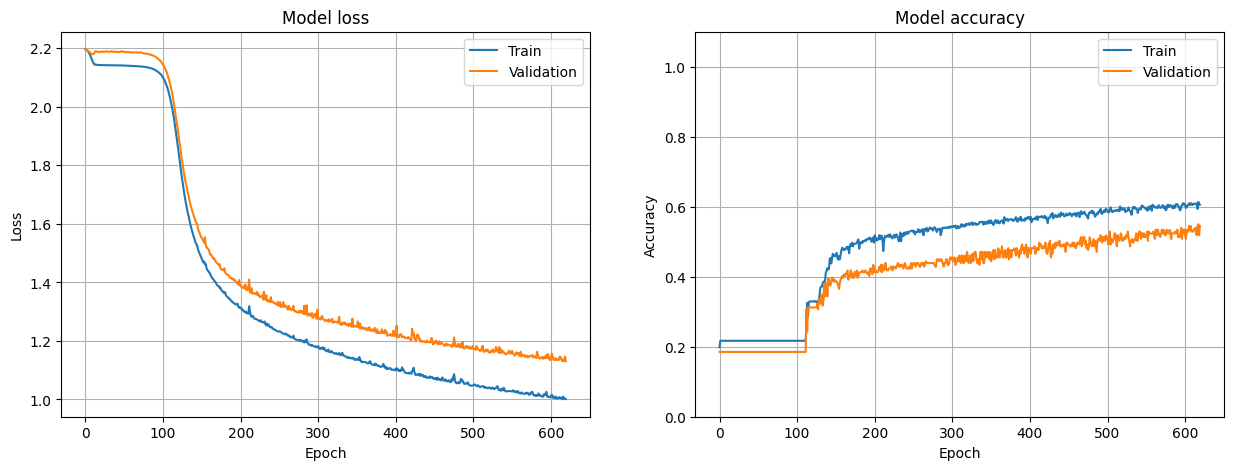

In [499]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses     import categorical_crossentropy
from tensorflow.keras.metrics    import categorical_accuracy
import pandas as pd
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical

# tensorflow
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
import tensorflow as tf
time_trials=800
inp      = Input((time_trials,))
layer1   = Dense(512, activation="linear") (inp)
layer2   = Dense(64, activation="relu") (layer1)
layer3   = Dense(264,activation="relu")   (layer2)
layer4   = Dense(100,activation="relu")  (layer3)
out      = Dense(9, activation="softmax") (layer4)

model = Model(inputs=inp,outputs=out)
print(data["t_s"].shape)
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
y = onehotencoder.fit_transform(data["t_s"].reshape(-1,1)).toarray()
R_ml[:,:300].shape

model.compile(Adam(learning_rate=1e-4), categorical_crossentropy, categorical_accuracy)
#print(enc.shape, R.shape)

X_test,X_val,y_test,y_val=train_test_split(R_ml[:time_trials,:].T,y,test_size=0.2)
#print(enc)
print(X_test.shape)
print(y_test.shape)
H = model.fit(
    X_test, 
    y_test,
    validation_data=(X_val,y_val),
    batch_size=100,
    epochs= 620
)
import matplotlib.pyplot as plt

def learning_curves(H):
  # Plot training & validation loss values
  f = plt.figure(figsize=(15,5))
  ax = f.add_subplot(121)
  ax2 = f.add_subplot(122)

  ax.plot(H.history['loss'])
  ax.plot(H.history['val_loss'])
  ax.set_title('Model loss')
  ax.set_ylabel('Loss')
  ax.set_xlabel('Epoch')
  ax.legend(['Train', 'Validation'])
  ax.grid(True)


  # Plot training & validation accuracy values
  ax2.plot(H.history['categorical_accuracy'])
  ax2.plot(H.history['val_categorical_accuracy'])
  ax2.set_title('Model accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylim((0,1.1))
  ax2.legend(['Train', 'Validation'])
  ax2.grid(True)


learning_curves(H)

(945,)
(756, 800)
(756, 9)
Epoch 1/620
1/1 [==============================] - 1s 794ms/step - loss: 2.1972 - categorical_accuracy: 0.1045 - val_loss: 2.1942 - val_categorical_accuracy: 0.2381
Epoch 2/620
1/1 [==============================] - 0s 55ms/step - loss: 2.1947 - categorical_accuracy: 0.2037 - val_loss: 2.1906 - val_categorical_accuracy: 0.2381
Epoch 3/620
1/1 [==============================] - 0s 49ms/step - loss: 2.1916 - categorical_accuracy: 0.2037 - val_loss: 2.1865 - val_categorical_accuracy: 0.2381
Epoch 4/620
1/1 [==============================] - 0s 55ms/step - loss: 2.1881 - categorical_accuracy: 0.2037 - val_loss: 2.1818 - val_categorical_accuracy: 0.2381
Epoch 5/620
1/1 [==============================] - 0s 54ms/step - loss: 2.1841 - categorical_accuracy: 0.2037 - val_loss: 2.1765 - val_categorical_accuracy: 0.2381
Epoch 6/620
1/1 [==============================] - 0s 53ms/step - loss: 2.1797 - categorical_accuracy: 0.2037 - val_loss: 2.1706 - val_categorical_accur

1/1 [==============================] - 0s 56ms/step - loss: 2.1530 - categorical_accuracy: 0.2037 - val_loss: 2.1411 - val_categorical_accuracy: 0.2381
Epoch 51/620
1/1 [==============================] - 0s 65ms/step - loss: 2.1529 - categorical_accuracy: 0.2037 - val_loss: 2.1408 - val_categorical_accuracy: 0.2381
Epoch 52/620
1/1 [==============================] - 0s 59ms/step - loss: 2.1529 - categorical_accuracy: 0.2037 - val_loss: 2.1406 - val_categorical_accuracy: 0.2381
Epoch 53/620
1/1 [==============================] - 0s 51ms/step - loss: 2.1529 - categorical_accuracy: 0.2037 - val_loss: 2.1405 - val_categorical_accuracy: 0.2381
Epoch 54/620
1/1 [==============================] - 0s 49ms/step - loss: 2.1528 - categorical_accuracy: 0.2037 - val_loss: 2.1404 - val_categorical_accuracy: 0.2381
Epoch 55/620
1/1 [==============================] - 0s 49ms/step - loss: 2.1528 - categorical_accuracy: 0.2037 - val_loss: 2.1404 - val_categorical_accuracy: 0.2381
Epoch 56/620
1/1 [=====

Epoch 100/620
1/1 [==============================] - 0s 67ms/step - loss: 2.0905 - categorical_accuracy: 0.2037 - val_loss: 2.0720 - val_categorical_accuracy: 0.2381
Epoch 101/620
1/1 [==============================] - 0s 74ms/step - loss: 2.0815 - categorical_accuracy: 0.2037 - val_loss: 2.0660 - val_categorical_accuracy: 0.2434
Epoch 102/620
1/1 [==============================] - 0s 96ms/step - loss: 2.0690 - categorical_accuracy: 0.2209 - val_loss: 2.0548 - val_categorical_accuracy: 0.3069
Epoch 103/620
1/1 [==============================] - 0s 74ms/step - loss: 2.0561 - categorical_accuracy: 0.2817 - val_loss: 2.0360 - val_categorical_accuracy: 0.2434
Epoch 104/620
1/1 [==============================] - 0s 72ms/step - loss: 2.0437 - categorical_accuracy: 0.2169 - val_loss: 2.0324 - val_categorical_accuracy: 0.3492
Epoch 105/620
1/1 [==============================] - 0s 66ms/step - loss: 2.0270 - categorical_accuracy: 0.3201 - val_loss: 2.0049 - val_categorical_accuracy: 0.3228
Epoc

1/1 [==============================] - 0s 60ms/step - loss: 1.3699 - categorical_accuracy: 0.4616 - val_loss: 1.4876 - val_categorical_accuracy: 0.4550
Epoch 150/620
1/1 [==============================] - 0s 58ms/step - loss: 1.3680 - categorical_accuracy: 0.4511 - val_loss: 1.4631 - val_categorical_accuracy: 0.4550
Epoch 151/620
1/1 [==============================] - 0s 60ms/step - loss: 1.3658 - categorical_accuracy: 0.4630 - val_loss: 1.4826 - val_categorical_accuracy: 0.4550
Epoch 152/620
1/1 [==============================] - 0s 57ms/step - loss: 1.3595 - categorical_accuracy: 0.4630 - val_loss: 1.4537 - val_categorical_accuracy: 0.4656
Epoch 153/620
1/1 [==============================] - 0s 59ms/step - loss: 1.3495 - categorical_accuracy: 0.4696 - val_loss: 1.4582 - val_categorical_accuracy: 0.4762
Epoch 154/620
1/1 [==============================] - 0s 53ms/step - loss: 1.3392 - categorical_accuracy: 0.4683 - val_loss: 1.4531 - val_categorical_accuracy: 0.4656
Epoch 155/620
1/1 

1/1 [==============================] - 0s 57ms/step - loss: 1.2100 - categorical_accuracy: 0.5079 - val_loss: 1.3858 - val_categorical_accuracy: 0.4868
Epoch 199/620
1/1 [==============================] - 0s 57ms/step - loss: 1.2127 - categorical_accuracy: 0.5198 - val_loss: 1.3634 - val_categorical_accuracy: 0.4656
Epoch 200/620
1/1 [==============================] - 0s 55ms/step - loss: 1.2125 - categorical_accuracy: 0.5066 - val_loss: 1.3820 - val_categorical_accuracy: 0.5026
Epoch 201/620
1/1 [==============================] - 0s 56ms/step - loss: 1.2082 - categorical_accuracy: 0.5225 - val_loss: 1.3567 - val_categorical_accuracy: 0.4815
Epoch 202/620
1/1 [==============================] - 0s 59ms/step - loss: 1.2010 - categorical_accuracy: 0.5106 - val_loss: 1.3624 - val_categorical_accuracy: 0.4868
Epoch 203/620
1/1 [==============================] - 0s 59ms/step - loss: 1.1944 - categorical_accuracy: 0.5146 - val_loss: 1.3552 - val_categorical_accuracy: 0.4815
Epoch 204/620
1/1 

1/1 [==============================] - 0s 57ms/step - loss: 1.1366 - categorical_accuracy: 0.5331 - val_loss: 1.3201 - val_categorical_accuracy: 0.4974
Epoch 248/620
1/1 [==============================] - 0s 61ms/step - loss: 1.1284 - categorical_accuracy: 0.5384 - val_loss: 1.2944 - val_categorical_accuracy: 0.5238
Epoch 249/620
1/1 [==============================] - 0s 58ms/step - loss: 1.1198 - categorical_accuracy: 0.5542 - val_loss: 1.2974 - val_categorical_accuracy: 0.5079
Epoch 250/620
1/1 [==============================] - 0s 57ms/step - loss: 1.1150 - categorical_accuracy: 0.5503 - val_loss: 1.2994 - val_categorical_accuracy: 0.4921
Epoch 251/620
1/1 [==============================] - 0s 60ms/step - loss: 1.1145 - categorical_accuracy: 0.5556 - val_loss: 1.2912 - val_categorical_accuracy: 0.5238
Epoch 252/620
1/1 [==============================] - 0s 55ms/step - loss: 1.1171 - categorical_accuracy: 0.5542 - val_loss: 1.3140 - val_categorical_accuracy: 0.5026
Epoch 253/620
1/1 

1/1 [==============================] - 0s 58ms/step - loss: 1.0817 - categorical_accuracy: 0.5569 - val_loss: 1.2964 - val_categorical_accuracy: 0.5238
Epoch 297/620
1/1 [==============================] - 0s 59ms/step - loss: 1.0845 - categorical_accuracy: 0.5556 - val_loss: 1.2567 - val_categorical_accuracy: 0.5185
Epoch 298/620
1/1 [==============================] - 0s 55ms/step - loss: 1.0811 - categorical_accuracy: 0.5569 - val_loss: 1.2850 - val_categorical_accuracy: 0.5238
Epoch 299/620
1/1 [==============================] - 0s 60ms/step - loss: 1.0753 - categorical_accuracy: 0.5648 - val_loss: 1.2484 - val_categorical_accuracy: 0.5450
Epoch 300/620
1/1 [==============================] - 0s 58ms/step - loss: 1.0662 - categorical_accuracy: 0.5754 - val_loss: 1.2592 - val_categorical_accuracy: 0.5238
Epoch 301/620
1/1 [==============================] - 0s 60ms/step - loss: 1.0589 - categorical_accuracy: 0.5820 - val_loss: 1.2482 - val_categorical_accuracy: 0.5344
Epoch 302/620
1/1 

1/1 [==============================] - 0s 55ms/step - loss: 1.0407 - categorical_accuracy: 0.5701 - val_loss: 1.2181 - val_categorical_accuracy: 0.5503
Epoch 346/620
1/1 [==============================] - 0s 59ms/step - loss: 1.0323 - categorical_accuracy: 0.5860 - val_loss: 1.2373 - val_categorical_accuracy: 0.5397
Epoch 347/620
1/1 [==============================] - 0s 59ms/step - loss: 1.0246 - categorical_accuracy: 0.5939 - val_loss: 1.2134 - val_categorical_accuracy: 0.5556
Epoch 348/620
1/1 [==============================] - 0s 58ms/step - loss: 1.0181 - categorical_accuracy: 0.6019 - val_loss: 1.2164 - val_categorical_accuracy: 0.5344
Epoch 349/620
1/1 [==============================] - 0s 60ms/step - loss: 1.0153 - categorical_accuracy: 0.6019 - val_loss: 1.2222 - val_categorical_accuracy: 0.5397
Epoch 350/620
1/1 [==============================] - 0s 58ms/step - loss: 1.0160 - categorical_accuracy: 0.6032 - val_loss: 1.2111 - val_categorical_accuracy: 0.5450
Epoch 351/620
1/1 

1/1 [==============================] - 0s 55ms/step - loss: 0.9906 - categorical_accuracy: 0.6019 - val_loss: 1.1919 - val_categorical_accuracy: 0.5503
Epoch 395/620
1/1 [==============================] - 0s 56ms/step - loss: 0.9982 - categorical_accuracy: 0.6045 - val_loss: 1.2292 - val_categorical_accuracy: 0.5450
Epoch 396/620
1/1 [==============================] - 0s 54ms/step - loss: 1.0018 - categorical_accuracy: 0.5939 - val_loss: 1.1900 - val_categorical_accuracy: 0.5503
Epoch 397/620
1/1 [==============================] - 0s 58ms/step - loss: 0.9951 - categorical_accuracy: 0.6085 - val_loss: 1.2038 - val_categorical_accuracy: 0.5503
Epoch 398/620
1/1 [==============================] - 0s 57ms/step - loss: 0.9870 - categorical_accuracy: 0.6058 - val_loss: 1.1896 - val_categorical_accuracy: 0.5556
Epoch 399/620
1/1 [==============================] - 0s 54ms/step - loss: 0.9824 - categorical_accuracy: 0.6124 - val_loss: 1.1853 - val_categorical_accuracy: 0.5608
Epoch 400/620
1/1 

1/1 [==============================] - 0s 59ms/step - loss: 1.0549 - categorical_accuracy: 0.5476 - val_loss: 1.2420 - val_categorical_accuracy: 0.5503
Epoch 444/620
1/1 [==============================] - 0s 58ms/step - loss: 0.9941 - categorical_accuracy: 0.5979 - val_loss: 1.2391 - val_categorical_accuracy: 0.5503
Epoch 445/620
1/1 [==============================] - 0s 55ms/step - loss: 0.9928 - categorical_accuracy: 0.5952 - val_loss: 1.2032 - val_categorical_accuracy: 0.5238
Epoch 446/620
1/1 [==============================] - 0s 54ms/step - loss: 1.0233 - categorical_accuracy: 0.5701 - val_loss: 1.1794 - val_categorical_accuracy: 0.5503
Epoch 447/620
1/1 [==============================] - 0s 59ms/step - loss: 0.9636 - categorical_accuracy: 0.6124 - val_loss: 1.2527 - val_categorical_accuracy: 0.5450
Epoch 448/620
1/1 [==============================] - 0s 66ms/step - loss: 1.0023 - categorical_accuracy: 0.5847 - val_loss: 1.1719 - val_categorical_accuracy: 0.5661
Epoch 449/620
1/1 

1/1 [==============================] - 0s 63ms/step - loss: 0.9434 - categorical_accuracy: 0.6296 - val_loss: 1.1586 - val_categorical_accuracy: 0.5767
Epoch 493/620
1/1 [==============================] - 0s 71ms/step - loss: 0.9425 - categorical_accuracy: 0.6257 - val_loss: 1.1591 - val_categorical_accuracy: 0.5767
Epoch 494/620
1/1 [==============================] - 0s 58ms/step - loss: 0.9422 - categorical_accuracy: 0.6257 - val_loss: 1.1555 - val_categorical_accuracy: 0.5714
Epoch 495/620
1/1 [==============================] - 0s 54ms/step - loss: 0.9420 - categorical_accuracy: 0.6270 - val_loss: 1.1574 - val_categorical_accuracy: 0.5767
Epoch 496/620
1/1 [==============================] - 0s 88ms/step - loss: 0.9411 - categorical_accuracy: 0.6270 - val_loss: 1.1578 - val_categorical_accuracy: 0.5820
Epoch 497/620
1/1 [==============================] - 0s 65ms/step - loss: 0.9409 - categorical_accuracy: 0.6270 - val_loss: 1.1540 - val_categorical_accuracy: 0.5767
Epoch 498/620
1/1 

1/1 [==============================] - 0s 59ms/step - loss: 0.9232 - categorical_accuracy: 0.6389 - val_loss: 1.1365 - val_categorical_accuracy: 0.5820
Epoch 542/620
1/1 [==============================] - 0s 55ms/step - loss: 0.9228 - categorical_accuracy: 0.6389 - val_loss: 1.1359 - val_categorical_accuracy: 0.5873
Epoch 543/620
1/1 [==============================] - 0s 62ms/step - loss: 0.9224 - categorical_accuracy: 0.6402 - val_loss: 1.1354 - val_categorical_accuracy: 0.5873
Epoch 544/620
1/1 [==============================] - 0s 62ms/step - loss: 0.9220 - categorical_accuracy: 0.6402 - val_loss: 1.1353 - val_categorical_accuracy: 0.5820
Epoch 545/620
1/1 [==============================] - 0s 60ms/step - loss: 0.9217 - categorical_accuracy: 0.6402 - val_loss: 1.1346 - val_categorical_accuracy: 0.5873
Epoch 546/620
1/1 [==============================] - 0s 60ms/step - loss: 0.9213 - categorical_accuracy: 0.6402 - val_loss: 1.1343 - val_categorical_accuracy: 0.5873
Epoch 547/620
1/1 

1/1 [==============================] - 0s 68ms/step - loss: 0.9036 - categorical_accuracy: 0.6468 - val_loss: 1.1170 - val_categorical_accuracy: 0.6032
Epoch 591/620
1/1 [==============================] - 0s 63ms/step - loss: 0.9034 - categorical_accuracy: 0.6521 - val_loss: 1.1133 - val_categorical_accuracy: 0.5979
Epoch 592/620
1/1 [==============================] - 0s 59ms/step - loss: 0.9031 - categorical_accuracy: 0.6468 - val_loss: 1.1155 - val_categorical_accuracy: 0.6032
Epoch 593/620
1/1 [==============================] - 0s 59ms/step - loss: 0.9025 - categorical_accuracy: 0.6521 - val_loss: 1.1143 - val_categorical_accuracy: 0.5979
Epoch 594/620
1/1 [==============================] - 0s 55ms/step - loss: 0.9018 - categorical_accuracy: 0.6468 - val_loss: 1.1121 - val_categorical_accuracy: 0.6032
Epoch 595/620
1/1 [==============================] - 0s 62ms/step - loss: 0.9013 - categorical_accuracy: 0.6495 - val_loss: 1.1155 - val_categorical_accuracy: 0.5979
Epoch 596/620
1/1 

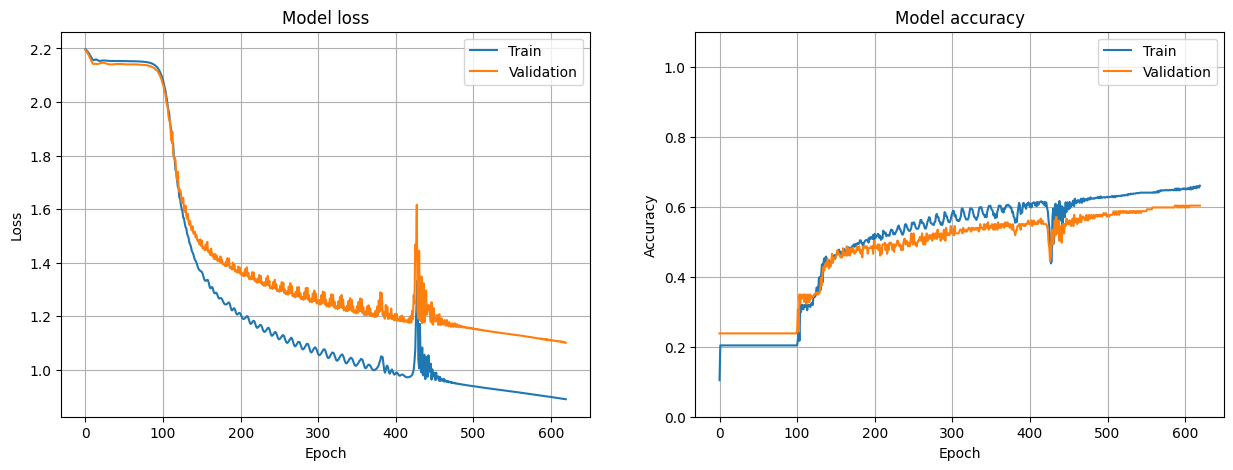

In [502]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses     import categorical_crossentropy
from tensorflow.keras.metrics    import categorical_accuracy
import pandas as pd
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical

# tensorflow
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
import tensorflow as tf
time_trials=800
inp      = Input((time_trials,))
layer1   = Dense(512, activation="relu") (inp)
layer2   = Dense(64, activation="relu") (layer1)
layer3   = Dense(264,activation="relu")   (layer2)
layer4   = Dense(100,activation="linear")  (layer3)
out      = Dense(9, activation="softmax") (layer4)

model = Model(inputs=inp,outputs=out)
print(data["t_s"].shape)
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
y = onehotencoder.fit_transform(data["t_s"].reshape(-1,1)).toarray()

model.compile(Adam(learning_rate=1e-3), categorical_crossentropy, categorical_accuracy)
#print(enc.shape, R.shape)

X_test,X_val,y_test,y_val=train_test_split(R_ml[:time_trials,:].T,y,test_size=0.2)
#print(enc)
print(X_test.shape)
print(y_test.shape)
H = model.fit(
    X_test, 
    y_test,
    validation_data=(X_val,y_val),
    batch_size=10000,
    epochs= 620
)
import matplotlib.pyplot as plt

def learning_curves(H):
  # Plot training & validation loss values
  f = plt.figure(figsize=(15,5))
  ax = f.add_subplot(121)
  ax2 = f.add_subplot(122)

  ax.plot(H.history['loss'])
  ax.plot(H.history['val_loss'])
  ax.set_title('Model loss')
  ax.set_ylabel('Loss')
  ax.set_xlabel('Epoch')
  ax.legend(['Train', 'Validation'])
  ax.grid(True)


  # Plot training & validation accuracy values
  ax2.plot(H.history['categorical_accuracy'])
  ax2.plot(H.history['val_categorical_accuracy'])
  ax2.set_title('Model accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylim((0,1.1))
  ax2.legend(['Train', 'Validation'])
  ax2.grid(True)


learning_curves(H)